In [214]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [215]:
import numpy as np
import pandas as pd

In [216]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [217]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [218]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [219]:
# reflect an existing database into a new model
database = automap_base()
# reflect the tables
database.prepare(engine, reflect=True)

In [220]:
# We can view all of the classes that automap found
database.classes.keys()

['measurement', 'station']

In [221]:
# Save references to each table
measurement = database.classes.measurement
station = database.classes.station

In [222]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [223]:
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

In [224]:
# Calculate the date 1 year ago from the last data point in the database
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year

datetime.date(2016, 8, 23)

# Exploratory Climate Analysis

In [225]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
percipitation_12month = session.query(measurement.date, measurement.prcp).filter(measurement.date >=one_year).order_by(measurement.date).all()
# percipitation_12month

In [226]:
# Perform a query to retrieve the data and precipitation scores
data_percip_scores = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).all()

In [227]:
# Save the query results as a Pandas DataFrame and set the index to the date column
percipitation_df = pd.DataFrame(percipitation_12month, columns=["Date", "Percipitation"])

In [228]:
# Sort the dataframe by date
percipitation_df.set_index("Date", inplace=True)
percipitation_df.head()

,Percipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


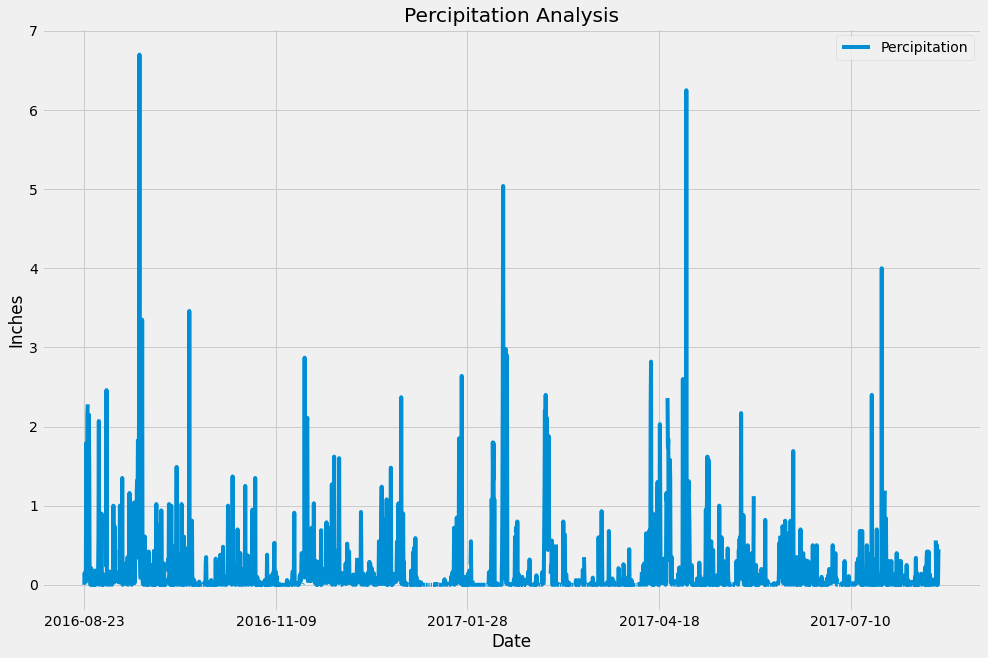

In [229]:
# Use Pandas Plotting with Matplotlib to plot the data
percipitation_df.plot(title="Percipitation Analysis", figsize=(15,10))
plt.legend
plt.xlabel("Date")
plt.ylabel("Inches")
plt.savefig("Images/percipitation_analysis.png")
plt.show()

In [230]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percipitation_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [231]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(measurement.station).distinct().count()
station_count

9

In [232]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [233]:
active_stations_top = active_stations[0]
active_stations_top

('USC00519281', 2772)

In [234]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station_data = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == active_stations_top[0]).all()
most_active_station_data

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [235]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
most_active_station_temp = session.query(measurement.tobs).filter(measurement.date >="2016-08-23").filter(measurement.station == "USC00519281").all()
most_active_station_temp_df = pd.DataFrame(most_active_station_temp)
most_active_station_temp_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


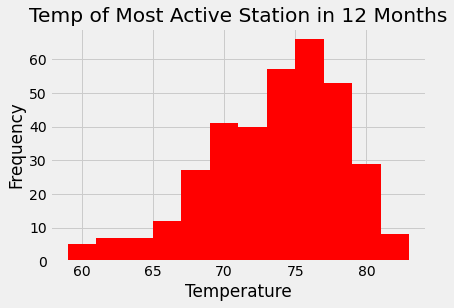

In [236]:
# plot the results as a histogram
plt.hist(most_active_station_temp_df["tobs"],bins = 12, color ="red")
plt.title("Temp of Most Active Station in 12 Months")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig("Images/temp_most_active_12_months.png")
plt.show()

## Bonus Challenge Assignment

In [237]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [238]:
trip_dates = "2020-02-28 to 2020-03-06"
start_date = "2012-02-28"
end_date = "2012-03-06"

In [239]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = session.query(measurement.date, measurement.tobs).filter(measurement.date >= start_date, measurement.date <= end_date).all()
trip_df = pd.DataFrame(trip)
tmin = trip_df["tobs"].min()
tmax = trip_df["tobs"].max()
tavg = trip_df["tobs"].mean()
print(f"Trip is February 28 2012 to March 6 2012")
print(f"Lowest Temperature is {tmin}")
print(f"Highest Temperature is {tmax}")
print(f"Average Temperature is {tavg}")

Trip is February 28 2012 to March 6 2012
Lowest Temperature is 62.0
Highest Temperature is 74.0
Average Temperature is 69.36507936507937


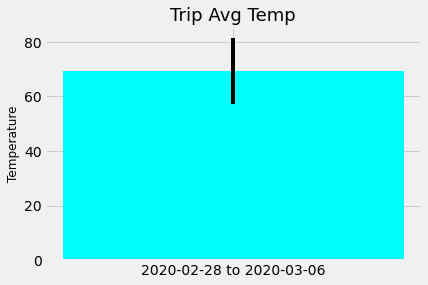

In [240]:
# Plot the results from your previous query as a bar chart. 
plt.bar(trip_dates, tavg, yerr= tmax-tmin, color = "cyan")
# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp", fontsize= 18)
# Use the average temperature for the y value
plt.ylabel("Temperature", fontsize= 12)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.show()

In [241]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = session.query(station.station,station.name,station.latitude,station.longitude,station.elevation,func.sum(measurement.prcp))\
.filter(measurement.station == station.station).filter(measurement.date >=start_date).filter(measurement.date<= end_date)\
.group_by(station.station).order_by(func.sum(measurement.prcp).desc())

station_rainfall_df = pd.DataFrame(rainfall, columns = [ "Station", "Name", "Latitude", "Longitude", "Elevation", "Average Rainfall"])
station_rainfall_df

,Station,Name,Latitude,Longitude,Elevation,Average Rainfall
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,13.67
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,12.93
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,9.30
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,8.12
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,5.18
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,3.84
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,3.59
7,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.91
8,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00


In [242]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [244]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date2 = "2020-02-28"
end_date2 = "2020-03-06"
# Use the start and end date to create a range of dates
pd.date_range(start="2/28/2020", periods=8)

DatetimeIndex(['2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06'],
              dtype='datetime64[ns]', freq='D')

In [246]:
# Stip off the year and save a list of %m-%d strings
month_day = (dt.datetime.strftime(start_date2 + dt.timedelta(days = x), "%M-%D")
             

# Loop through the list of %m-%d strings and calculate the normals for each date

SyntaxError: invalid syntax (<ipython-input-246-db11462a3243>, line 4)

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
